# Test Implementation

In [ ]:
import chess
import chess.engine
from stockfish import Stockfish

def calculate_best_move(fen: str) -> str:
    """
    Takes an FEN, calculates the best move using Stockfish, and returns the updated FEN.

    Parameters:
        fen (str): The FEN string representing the current board state.
        stockfish_path (str): The path to the Stockfish engine executable.

    Returns:
        str: The updated FEN after making the best move, or the original FEN if no move is possible.
    """
    board = chess.Board(fen)  # Initialize the board with the given FEN

    # Ensure the board is in a valid state
    if board.is_game_over():
        print("Game is over: No moves possible")
        return fen

    # Start the Stockfish engine
    with chess.engine.SimpleEngine.popen_uci(stockfish_path) as engine:
        # Analyze the position and get the best move
        result = engine.play(board, chess.engine.Limit(time=1.0))  # 1 second calculation
        best_move = result.move

        # Apply the move to the board
        board.push(best_move)

        # Return the updated FEN
        return board.fen()

# Example Usage
if __name__ == "__main__":
    # Provide the path to your Stockfish executable
    stockfish_path = "stockfish/stockfish-windows-x86-64-sse41-popcnt.exe"

    # Example FEN string (starting position)
    initial_fen = "rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1"
    
    new_fen = calculate_best_move(initial_fen, stockfish_path)
    print("Updated FEN:", new_fen)

    compare_fen = 'rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq e3 0 1'
    if new_fen == compare_fen:
        print("FENs match!")
    else:
        print("FENs do not match!")


NotImplementedError: 

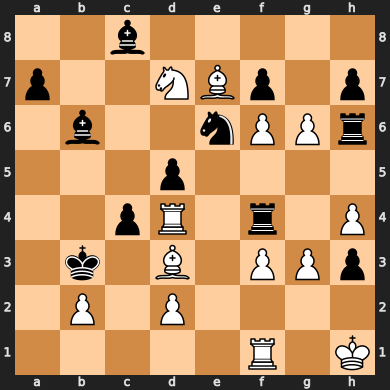

In [19]:
from stockfish import Stockfish
import chess

board = chess.Board()
stockfish = Stockfish("stockfish/stockfish-windows-x86-64-sse41-popcnt.exe")

compare_fen = 'rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq e3 0 1'

r_fen = '2b5/p2NBp1p/1b2nPPr/3p4/2pR1r1P/1k1B1PPp/1P1P4/5R1K b - - 0 5'

board.set_fen(r_fen)

display(board)

# Main Implementation

In [ ]:
import chess
import chess.engine

#####
def get_board(img_path: str) -> str:
    FEN = 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1'
    return FEN

def calculate_best_move(fen: str, stockfish_path: str) -> str:
    """
    Takes an FEN, calculates the best move using Stockfish, and returns the updated FEN.

    Parameters:
        fen (str): The FEN string representing the current board state.
        stockfish_path (str): The path to the Stockfish engine executable.

    Returns:
        str: The updated FEN after making the best move, or the original FEN if no move is possible.
    """
    board = chess.Board(fen)  # Initialize the board with the given FEN

    # Ensure the board is in a valid state
    if board.is_game_over():
        print("Game is over: No moves possible")
        return fen

    # Start the Stockfish engine
    with chess.engine.SimpleEngine.popen_uci(stockfish_path) as engine:
        # Analyze the position and get the best move
        result = engine.play(board, chess.engine.Limit(time=1.0))  # 1 second calculation
        best_move = result.move

        # Apply the move to the board
        board.push(best_move)

        # Return the updated FEN
        return board.fen()
    

    
def evaluate_move(initial_fen: str, after_move_fen: str, stockfish_path: str) -> float:
    """
    Evaluates how good a move is by comparing the initial FEN and the FEN after the move.

    Parameters:
        initial_fen (str): The FEN string of the board before the move.
        after_move_fen (str): The FEN string of the board after the move.
        stockfish_path (str): The path to the Stockfish engine executable.

    Returns:
        float: The evaluation score of the position after the move. Positive values favor white, negative values favor black.
    """
    # Load initial and after-move boards
    initial_board = chess.Board(initial_fen)
    after_move_board = chess.Board(after_move_fen)

    # Start the Stockfish engine
    with chess.engine.SimpleEngine.popen_uci(stockfish_path) as engine:
        # Evaluate the initial position
        initial_info = engine.analyse(initial_board, chess.engine.Limit(time=1.0))
        initial_score = initial_info["score"].relative.score(mate_score=10000)

        # Evaluate the position after the move
        after_move_info = engine.analyse(after_move_board, chess.engine.Limit(time=1.0))
        after_move_score = after_move_info["score"].relative.score(mate_score=10000)

    # Return the change in evaluation (higher value indicates a better move)
    return after_move_score - initial_score

def compare_boards(fen1: str, fen2: str) -> bool:
    if new_fen == compare_fen:
        return True
    else:
        return False

# Example Usage
if __name__ == "__main__":
    stockfish_path = "stockfish"
    initial_fen = None
    new_fen = None
    done = False
    move = 0

    img_1 = 'img1.jpg'
    img_2 = 'img2.jpg'
    
    while(done == False):
        # Get FEN of current board by taking a picture
        ## TAKE PICTURE OF BOARD
        initial_fen = get_board()

        # Calculate the score of the move and print
        if new_fen == None:
            print("Score of move f{move}:", evaluate_move(initial_fen, new_fen, stockfish_path))
            
        # Calculate the best move
        new_fen = calculate_best_move(initial_fen, stockfish_path)
        print("Updated FEN:", new_fen)

        ## ROBOT ARM SHOULD MOVES THE PIECE PIECE
        ## TAKE PICTURE OF BOARD
        compare_fen = get_board()
        if new_fen == compare_fen:
            print("FENs match!")
            # If no move is allowed, the game is over
            if initial_fen == compare_fen:
                done = True
        else:
            print("FENs do not match!")
        
        move += 1
